In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud


In [7]:
data = {
    'Text': [
        "I love this product",
        "This is the worst experience",
        "Absolutely fantastic service",
        "I hate waiting in long queues",
        "Not bad, could be better",
        "Excellent quality and fast delivery",
        "Very disappointing and rude staff",
        "I am happy with my purchase",
        "Worst product ever",
        "Totally satisfied and recommended"
    ],
    'Sentiment': [
        "positive",
        "negative",
        "positive",
        "negative",
        "neutral",
        "positive",
        "negative",
        "positive",
        "negative",
        "positive"
    ]
}

df = pd.DataFrame(data)
df.head()


,Text,Sentiment
0,I love this product,positive
1,This is the worst experience,negative
2,Absolutely fantastic service,positive
3,I hate waiting in long queues,negative
4,"Not bad, could be better",neutral


Sentiment
positive    5
negative    4
neutral     1
Name: count, dtype: int64


/tmp/ipython-input-1146879980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


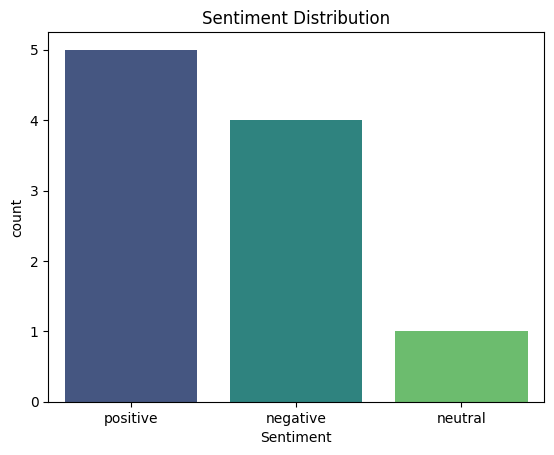

In [8]:
print(df['Sentiment'].value_counts())

sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


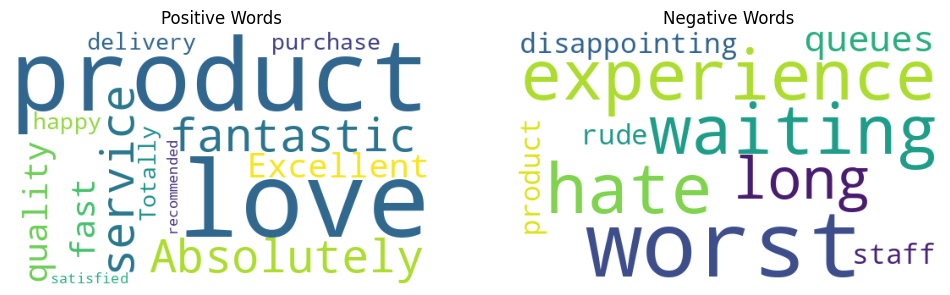

In [9]:
positive_text = ' '.join(df[df['Sentiment'] == 'positive']['Text'])
negative_text = ' '.join(df[df['Sentiment'] == 'negative']['Text'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_text))
plt.title('Positive Words')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(negative_text))
plt.title('Negative Words')
plt.axis('off')
plt.show()


In [10]:
df['Text'] = df['Text'].str.lower()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [13]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, zero_division=0))


Accuracy: 0.0

Confusion Matrix:
 [[0 2]
 [0 0]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       2.0
    positive       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [14]:
feature_names = vectorizer.get_feature_names_out()
class_labels = model.classes_

for i, class_label in enumerate(class_labels):
    top_features = np.argsort(model.feature_log_prob_[i])[-5:]
    print(f"{class_label.capitalize()} sentiment:", [feature_names[j] for j in top_features])


Negative sentiment: ['queues', 'disappointing', 'rude', 'staff', 'very']
Neutral sentiment: ['not', 'be', 'bad', 'could', 'better']
Positive sentiment: ['absolutely', 'fantastic', 'service', 'love', 'and']


In [15]:

print("\nSentiment Analysis Task Completed ✅")


Sentiment Analysis Task Completed ✅
